<a href="https://colab.research.google.com/github/w2k31984/Analisis-de-prediccion-de-precios-de-casas-con-regresion-lineal/blob/master/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [2]:
#Leyendo los datos
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
print('Librerías importadas con exito!')

Librerías importadas con exito!


In [3]:
#Importando nuestro set de datos.
from google.colab import drive
drive.mount('/content/drive')
datos = pd.read_csv('/content/drive/MyDrive/Data_Science/Estadistica_Python/precios_casas.csv')
datos.head()

Mounted at /content/drive


,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [4]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [5]:
datos= datos.drop(columns='Id')
datos.head()

,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [6]:
# Correlación
corr = datos.corr()
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


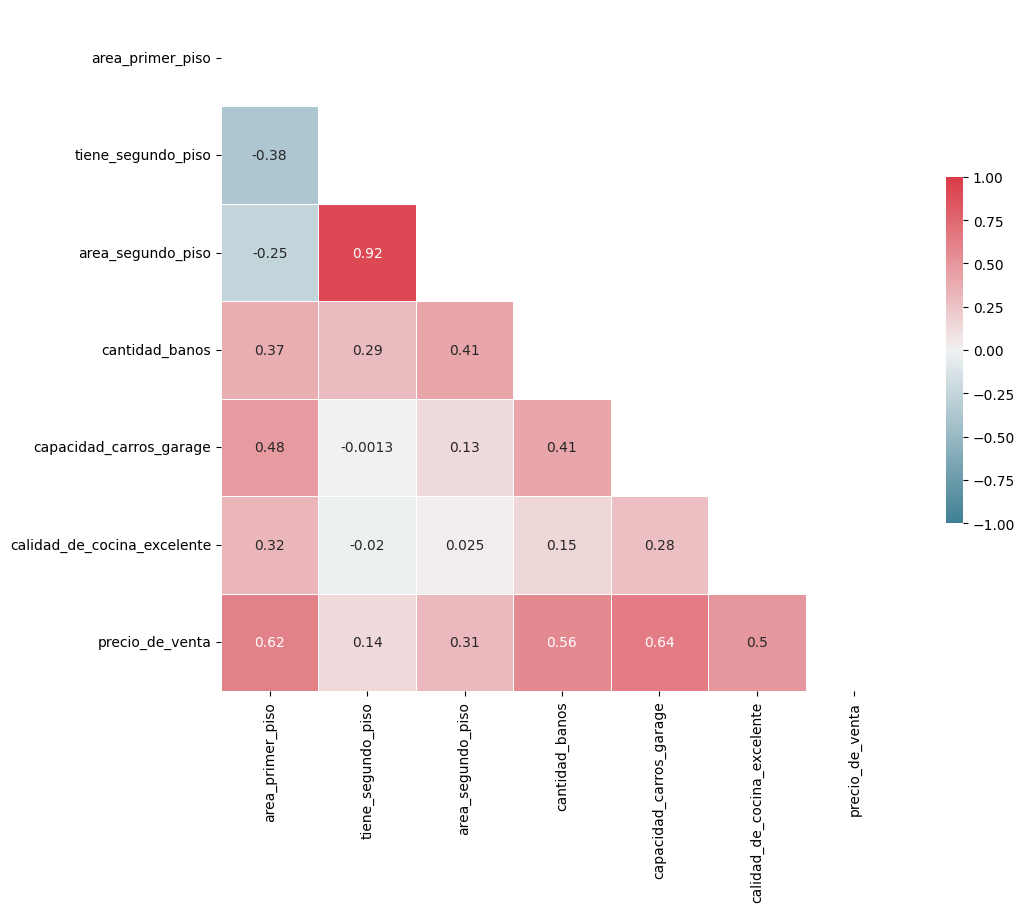

In [7]:
# Actividad
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()


#Cuáles factores están más correlacionados?
* La correlación entre la capacidad de coches en la garaje y el área del primer piso es 0.48 moderadamente positiva, indicando que, en general, a medida que la capacidad de coches en la garaje aumenta, el área del primer piso de la casa tiende a aumentar también.
* Entre garaje para coches y cantidad de baños es moderadamente positiva (0.409281), indicando que, en general, a medida que la capacidad de la garaje aumenta, el número de baños también tiende a aumentar.
Esto sugiere una posible asociación entre el espacio para estacionamiento de vehículos y el tamaño de la residencia.
* Cuando miramos la correlación entre el área del primer piso y el área del segundo piso, verificamos que es débil y negativa (-0.25). Esto sugiere que, en general, cuando el área del primer piso de una casa aumenta, el área del segundo piso tiende a disminuir un poco, y viceversa.
Esta relación indica una posible compensación entre las áreas de los dos pisos, pero no es una relación muy fuerte y puede variar entre diferentes propiedades.

## Relacionando variables

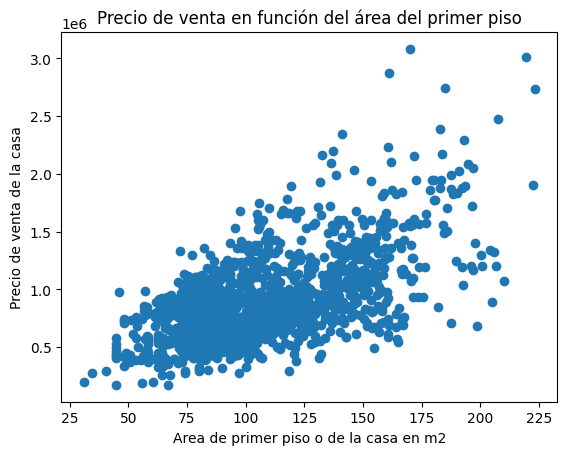

In [8]:
# Cómo se relacionan el área construída y el precio del inmueble?
#Generando grafico de dispersion para observar como es la correlacion entre el area de los inmuebles vrs. el precio.
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.title('Precio de venta en función del área del primer piso')
plt.xlabel('Area de primer piso o de la casa en m2')
plt.ylabel('Precio de venta de la casa')
plt.show()


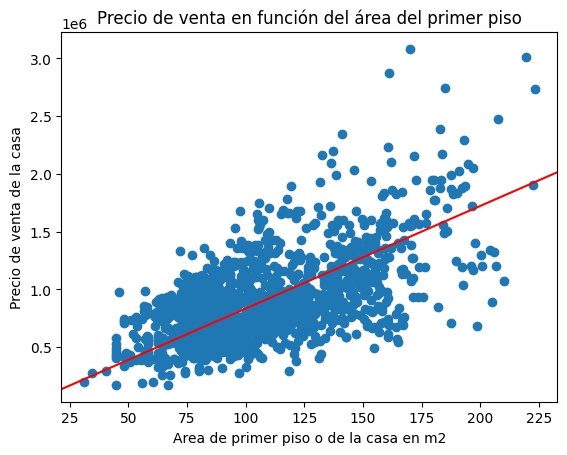

In [9]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.axline(xy1=(40,300000),xy2=(175,1500000),color='red')
plt.title('Precio de venta en función del área del primer piso')
plt.xlabel('Area de primer piso o de la casa en m2')
plt.ylabel('Precio de venta de la casa')
plt.show()


## Mejor recta

In [10]:
# Cuál es la recta que mejor se ajusta a esta relación
#Se utilizara el metodo de los cuadrados o el OLS, el cual ayuda a encontrar la distancia entre los residuos minimos.
px.scatter(datos, x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso X   
* Variable de respuesta/dependiente: Precio de la casa
Y

/tmp/ipython-input-11-590402545.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




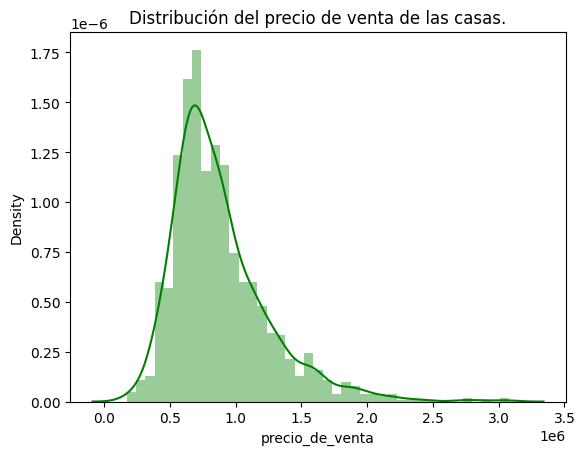

In [11]:
#Quién es nuestra variable de respuesta?
sns.distplot(datos['precio_de_venta'], kde=True,color= 'green')
plt.title('Distribución del precio de venta de las casas.')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [12]:
# import train_test_split
from sklearn.model_selection import train_test_split
print('Librerías importadas con exito!')

Librerías importadas con exito!


In [13]:
#Definiciendo las variables.
y = datos['precio_de_venta']
x = datos.drop(columns='precio_de_venta')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230) #Garantizar la reproductivilidad de la segregacion de los datos.

In [14]:
#Datos de entrenamiento para usar la fórmula
#Utilizamos el OLS para construir un DF de entrenamiento.
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train
df_train.head()

,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
1303,65.7732,0,0.0000,1,0,0,406725.0
326,55.3684,1,55.3684,1,189,0,384540.0
386,74.6916,1,107.4853,2,560,0,1059950.0
615,103.6764,0,0.0000,1,440,0,788800.0
236,94.2006,1,67.8170,2,457,0,958885.0


In [15]:
# import ols para utilizar la tecnica de los minimos cuadrados ordinarios.
from statsmodels.formula.api import ols
print('Librerías importadas con exito!')


Librerías importadas con exito!


In [16]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit() #fit es ajustar la convinacion para modelo_0

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [17]:
# visualizando los parámetros la unidad de los valores es en USD de Estados Unidos de America.
modelo_0.params
modelo_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        02:43:36   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04      4.981      0.000    9.27e+04    2.13e+05
area_primer_piso  6793.6416    275.455     24.663      0.000    6253.109    7334.175
==============================================================================
Omnibus:                      190.778   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.457
Skew:                           0.998   Prob(JB):                    1.72e-105
Kurtosis:                       5.743   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# El resumen del modelo
print(modelo_0.summary())


                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        02:43:39   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [19]:
# observando el R²
#modelo_0.rsquared 1a. forma
round(modelo_0.rsquared,2) #2a. forma


np.float64(0.38)

**Analisis de la Metrica R2** <br>
En esto concluimos que un 37% del precio de la casa es afectado por el area del primer piso de la casa mientras que el restante 62% no esta siendo explicado por el modelo, se traeran otras variables para nuestro modelo a fin de poder explicar de mejor forma mas componentes del precio.

## Entendiendo el resíduo

In [20]:
# Quiénes son los residuos?
#Es la diferencia entre mi observacion y el valor de la recta o punto de la recta mas cercano a esa observacion
#El residuo debe ser lo mas cercano a cero posible.
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


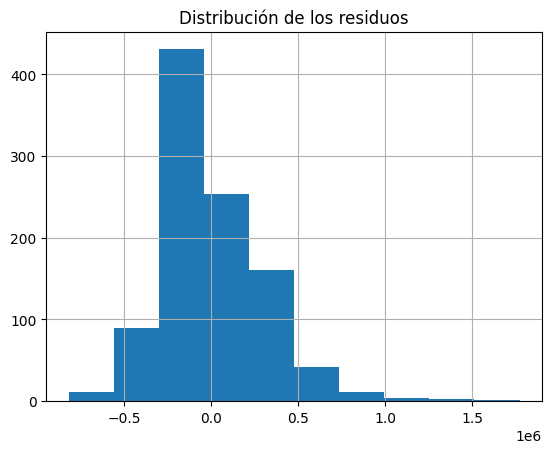

In [21]:
# Cómo están distribuidos
#Para ver como se esta ajustando nuestro modelo.
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()


**Interpretacion del grafico de residuos.<br>**
 Se esta teniendo alrededor de 400 inmuebles 430 que el reciduo esta entre 300000 a 100000 USD esta siendo estimado que cuentan mas cuando en realidad cuestan 300000 menos, esto quiere decir que nuestro modelo se esta ajustando perfectamente o casi perfecto a nuestros datos.<br><br>
**Conclusion.**<br>
Entre menor sea el residuo o cerca a cero mejor va a ser la generalizacion de nuestro modelo con los datos de entrenamiento del modelo.

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [22]:
# definiendo la 'Y' prevista
#Colocando a prueba nuestro modelo con datos de prueba.
#Realizando la prueba con nuestro modelo de pruebas modelo_0
y_pred = modelo_0.predict(X_test)

In [23]:
# importando el r2_score
from sklearn.metrics import r2_score
print('Librerías importadas con exito!')

Librerías importadas con exito!


In [24]:
# mostrando el resultado de r²
print(f'El coeficiente de determinacion R² para el modelo con los datos de prueba es de: {r2_score(y_test, y_pred):.2f}')

El coeficiente de determinacion R² para el modelo con los datos de prueba es de: 0.39


Con esto hemos destacado la importancia de conocer el concepto y explicar el modelo aun falta el 61% por explicar y atributos por modelar.

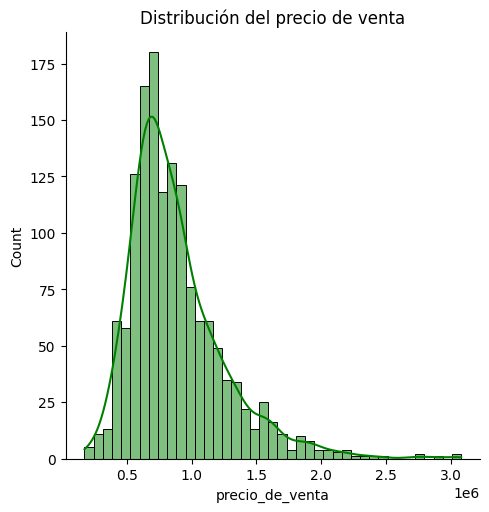

In [25]:
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()

**Explicacion de la grafica.** <br>
Al ejecutar, pudimos identificar una asimetría en los datos. Tenemos algunos inmuebles cuyo precio de venta está lejos del comportamiento mediano, es decir, la presencia de valores muy altos sugiere la existencia de propiedades de alto valor, en comparación con la mayoría de las otras propiedades en el conjunto de datos.

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

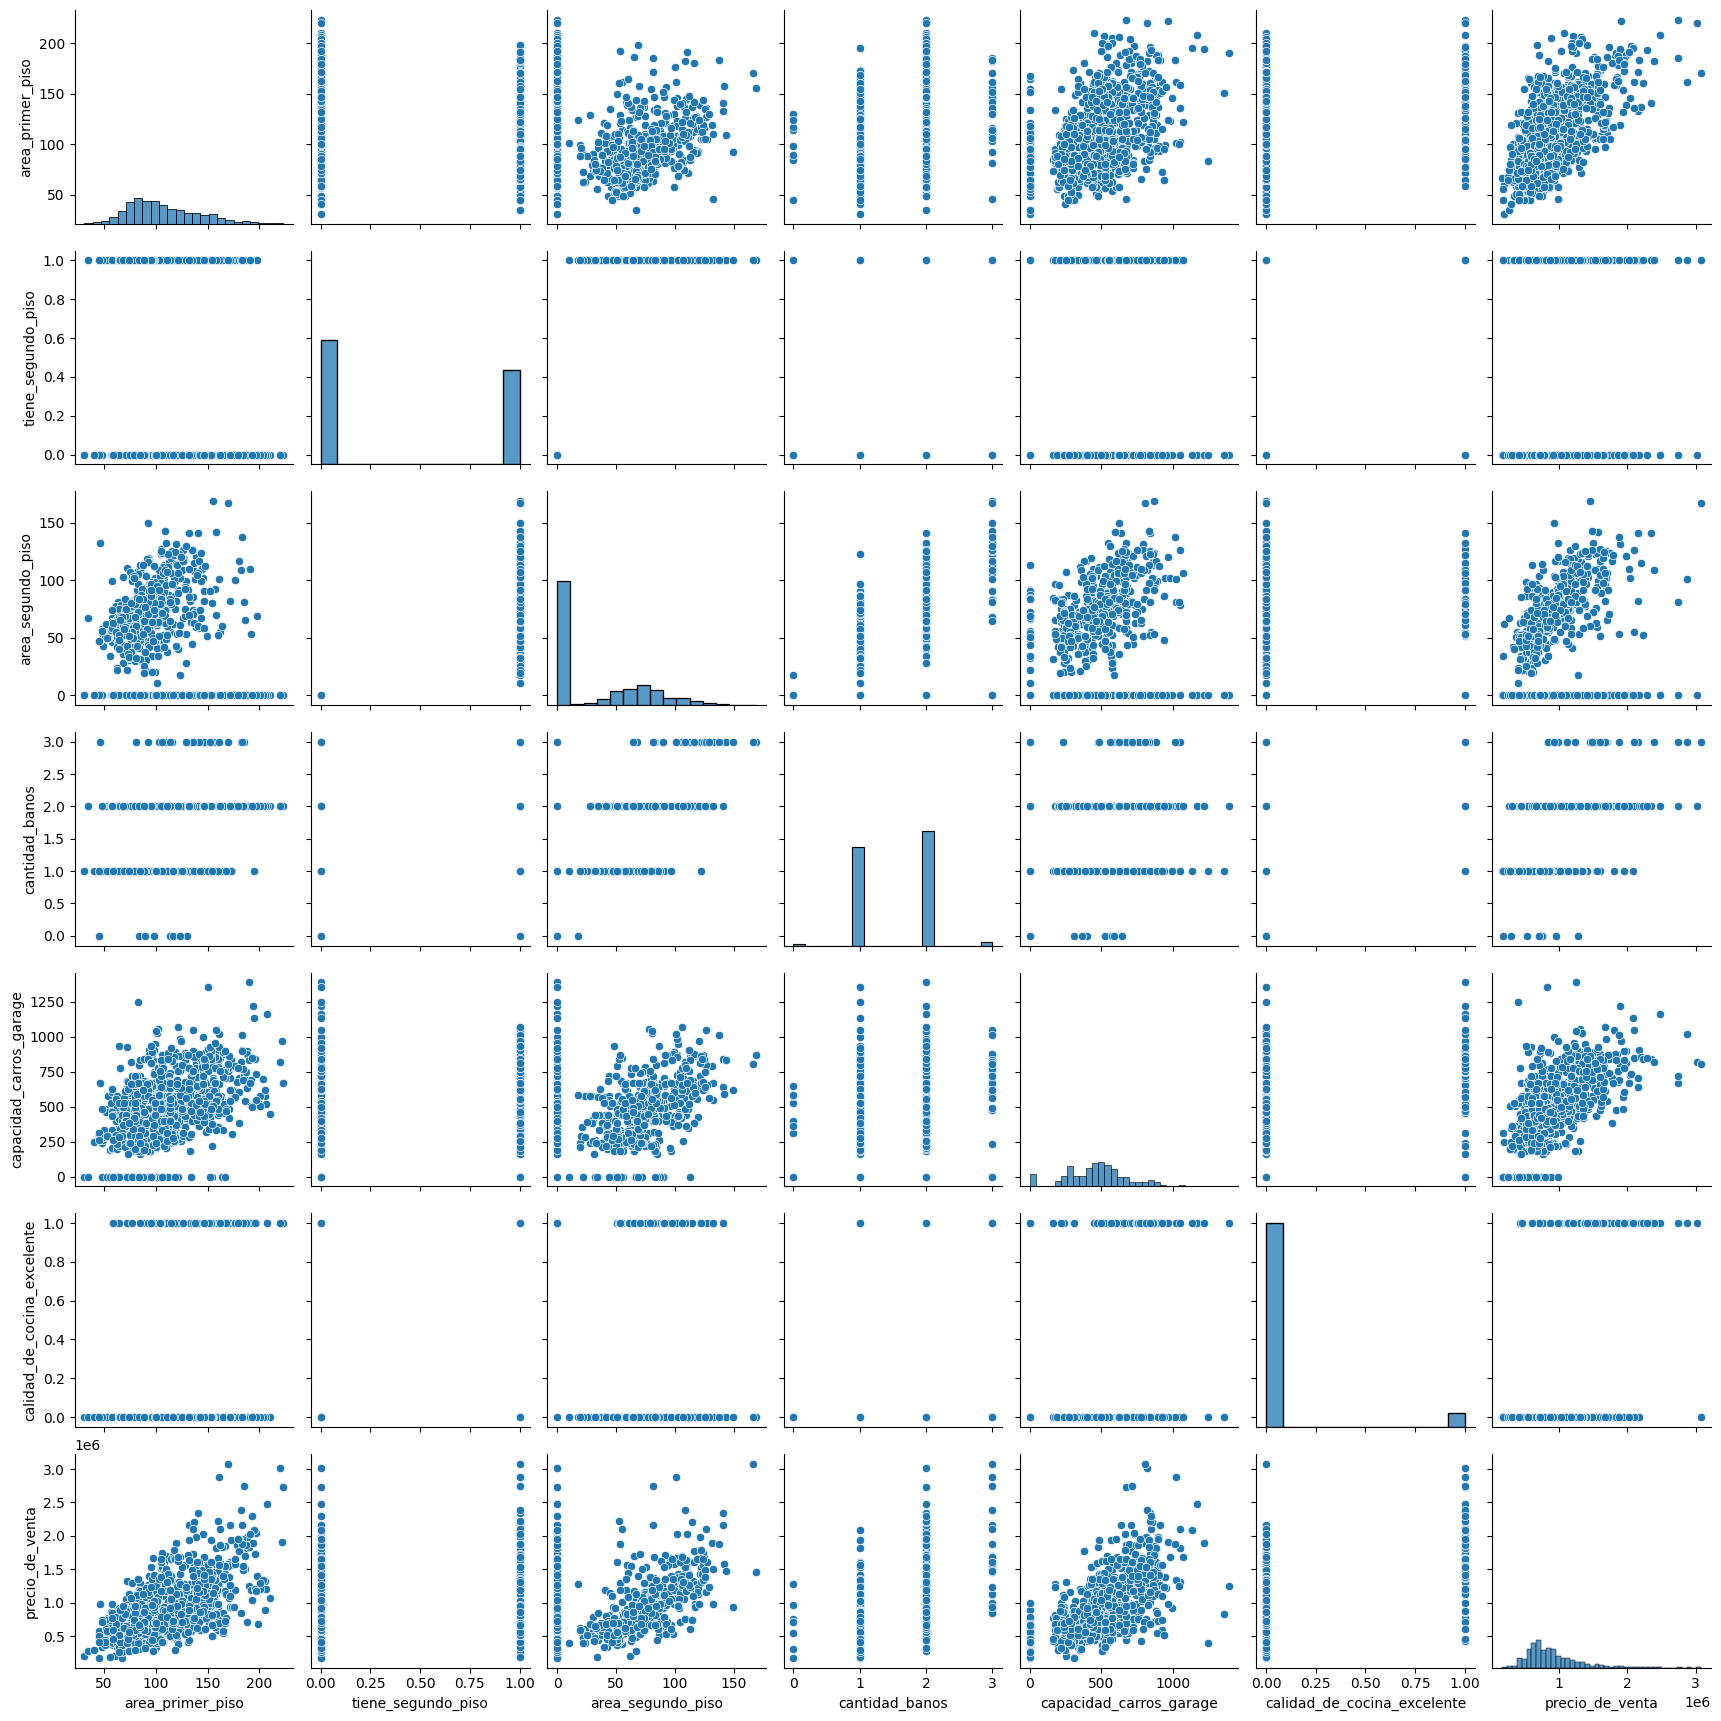

In [26]:
# cuáles otras características podrían explicar el precio de los inmuebles?
# Es recomendable utilizar para visualizar como se relacionan variables entre si.
sns.pairplot(datos)
plt.show()

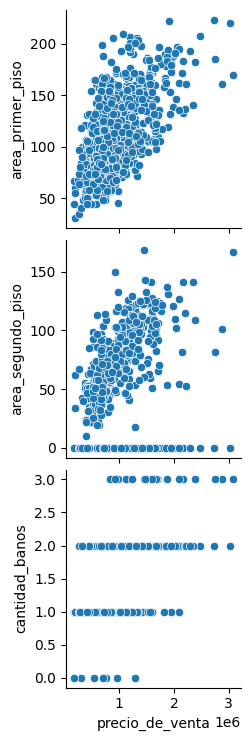

In [27]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos, y_vars=['area_primer_piso','area_segundo_piso','cantidad_banos'], x_vars='precio_de_venta')
plt.show()

**Analisis del grafico.** <br>
Podemos denotar que en cuanto mas baños posee una casa aumenta el precio de venta, y mientras tenga mas area en el segundo piso de la casa aumenta igualmente el precio de venta.

## Añadiendo factores al modelo

In [28]:
# importando la api de statsmodels
import statsmodels.api as sm
print('Librerías importadas con exito!')

Librerías importadas con exito!


In [29]:
# Añadiendo una constante
# Generando nuestras rectas mediante el metodo de ATS directamente desde statsmodels.
# La nueva constante ayuda a poder estimar mejor el valor de intercepcion en el eje Y.
X_train = sm.add_constant(X_train)
X_train.head()


,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [30]:
from re import X
X_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [31]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        precio_de_venta   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     477.4
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          2.79e-289
Time:                        02:44:21   Log-Likelihood:                -13640.
No. Observations:                1006   AIC:                         2.729e+04
Df Residuals:                     999   BIC:                         2.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -6.125e+04   2.66e+04     -2.300      0.022   -1.14e+05   -8995.504
area_primer_piso             4875.9606    263.564     18.500      0.000    4358.757    5393.164
tiene_segundo_piso          -1.344e+05   3.28e+04     -4.100      0.000   -1.99e+05   -7.01e+04
area_segundo_piso            4709.3824    415.473     11.335      0.000    3894.082    5524.683
cantidad_banos               6.463e+04   1.44e+04      4.477      0.000    3.63e+04     9.3e+04
capacidad_carros_garage       432.7614     34.818     12.429      0.000     364.437     501.086
calidad_de_cocina_excelente  3.779e+05   2.51e+04     15.034      0.000    3.29e+05    4.27e+05
==============================================================================
Omnibus:                      122.435   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              951.557
Skew:                           0.235   Prob(JB):                    2.35e-207
Kurtosis:                       7.741   Cond. No.                     3.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train, X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                    'cantidad_banos', 'capacidad_carros_garage',
                                    'calidad_de_cocina_excelente']]).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        precio_de_venta   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     485.3
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          1.93e-264
Time:                        02:44:25   Log-Likelihood:                -13701.
No. Observations:                1006   AIC:                         2.741e+04
Df Residuals:                    1000   BIC:                         2.744e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.418e+05   2.73e+04     -5.202      0.000   -1.95e+05   -8.83e+04
area_primer_piso             4746.1134    279.596     16.975      0.000    4197.451    5294.776
tiene_segundo_piso           1.929e+05   1.65e+04     11.713      0.000    1.61e+05    2.25e+05
cantidad_banos                1.07e+05   1.48e+04      7.224      0.000    7.79e+04    1.36e+05
capacidad_carros_garage       507.4068     36.303     13.977      0.000     436.167     578.646
calidad_de_cocina_excelente  3.849e+05   2.67e+04     14.423      0.000    3.32e+05    4.37e+05
==============================================================================
Omnibus:                      159.386   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1319.296
Skew:                           0.452   Prob(JB):                    3.30e-287
Kurtosis:                       8.537   Cond. No.                     2.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train, X_train[['const', 'area_primer_piso','tiene_segundo_piso','cantidad_banos','calidad_de_cocina_excelente']]).fit()

In [34]:
# Resumen del modelos
# creamos una lista en python de todos los modelos.
modelos=[modelo_0,modelo_1,modelo_2,modelo_3]
for i,j in enumerate(modelos):
    print(f'****************************************************************************\n*******************El modelo {i} Tiene el siguiente resumen*******************\n**********************************************************************')
    print(j.summary(), '\n\n')

****************************************************************************
*******************El modelo 0 Tiene el siguiente resumen*******************
**********************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        02:44:29   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                           

In [35]:
for i,j in enumerate(modelos):
   print(f'El coeficiente de determinacion de R² del modelo {i}:{j.rsquared.round(2)}')

El coeficiente de determinacion de R² del modelo 0:0.38
El coeficiente de determinacion de R² del modelo 1:0.74
El coeficiente de determinacion de R² del modelo 2:0.71
El coeficiente de determinacion de R² del modelo 3:0.65


## Comparando los modelos
Cuál es el modelo?


In [36]:
# Cuántos parámetros tiene el modelo?
# Vamos a tomar el modelo 3
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [37]:
# Añadiendo una constante en X_test
X_test = sm.add_constant(X_test)
X_test.head()


,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0
1138,1.0,117.5185,0,0.0000,2,502,0
1391,1.0,171.3076,0,0.0000,2,620,0
516,1.0,117.6114,0,0.0000,2,453,0


In [38]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(X_test[['const', 'area_primer_piso','tiene_segundo_piso','cantidad_banos','calidad_de_cocina_excelente']])

In [39]:
# Cuál es coheficiente de determinacion r² de la previsión?
print(f'El coeficiente de determinacion R² de la base de prevision es: {modelo_3.rsquared.round(2)}')


El coeficiente de determinacion R² de la base de prevision es: 0.65


In [40]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente de determinacion R² con respecto a la base de entrenamiento es: {round(r2_score(y_test, prevision_3),2)}')

El coeficiente de determinacion R² con respecto a la base de entrenamiento es: 0.64


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [42]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({'const':[1],
                               'area_primer_piso':[120.00],
                               'tiene_segundo_piso':[1],
                               'cantidad_banos':[2],
                               'calidad_de_cocina_excelente':[0]})

In [43]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

,0
0,968146.29


In [44]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

,0
0,1123758.24


In [45]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [48]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv('/content/drive/MyDrive/Data_Science/Estadistica_Python/nuevas_casas.csv', sep=';')
nuevas_casas.head()

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [58]:
#Eliminando la columna de identificacion de la casa
nuevas_casas = nuevas_casas.drop(columns='Casa')

In [59]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)
nuevas_casas.head()

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [61]:
# Cuál es el precio de estas nuevas casas?
#precio_casas = pd.DataFrame()
nuevas_casas['Precio de Venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas


,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de Venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


In [63]:
#Otro ejemplo practico para aplicar el modelo.
#Nuevo inmueble
nuevo_inmueble2 = pd.DataFrame({'const':[1],
                               'area_primer_piso':[98.00],
                               'tiene_segundo_piso':[0],
                               'cantidad_banos':[1],
                               'calidad_de_cocina_excelente':[1]})

In [64]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble2['area_primer_piso']).round(2)

,0
0,818686.17


In [65]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble2).round(2)

,0
0,1063173.85


In [67]:
#Guardando nuestro modelo de datos.
import pickle

# Nombre del archivo donde se guardará el modelo
nombre_archivo = 'modelo_regresion_lineal.pkl'

# Guardar el modelo en un archivo usando pickle
with open(nombre_archivo, 'wb') as archivo:
    pickle.dump(modelo_3, archivo)

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [73]:
# importar el VIF de statsmodel
# VIF es Factor de inflacion de la varianza.
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
print('Librerías importadas con exito!')


Librerías importadas con exito!


In [74]:
#Creando las variables explicativas.
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']
explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso','cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']
explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso','cantidad_banos','calidad_de_cocina_excelente']

In [76]:
# VIF 1
#Modelo saturado
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas_1
#Calculando el factor de inflacion de la varianza para todas las variables
vif_1['VIF'] = [VIF(X_train[explicativas_1],i) for i in range(len(explicativas_1))]
vif_1

,variables,VIF
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [77]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variables'] = explicativas_3
#Calculando el factor de inflacion de la varianza para todas las variables
vif_3['VIF'] = [VIF(X_train[explicativas_3],i) for i in range(len(explicativas_3))]
vif_3

,variables,VIF
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [82]:
#Prevision de los valores de entrenamiento X_train[explicativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])

In [86]:
#Generando un scatter plot entre y_previsto e y_train
fig = px.scatter(x=y_previsto_train,y=y_train, title='Valor Previsto vrs. Valor Real',
                 labels={'x':'Valor Previsto', 'y':'Valor Real'})
fig.show()


**Interpretacion de la grafica:**<br>
Nuestro modelo funciona bien en poder predecir el valor real y el previsto cuando el precio de las casas es menor o igual al 1M de USD mientras que ya cuando pasa de esa cantidad puede tener demasiada variacion entre el valor previsto y el valor real.

In [87]:
#Residuos
residuos = modelo_3.resid
fig = px.scatter(x=y_previsto_train,y=residuos, title='Valor Previsto vrs. Valor de Residuos',
                 labels={'x':'Valor Previsto', 'y':'Valor de Residuos'})
fig.show()


**Interpretacion de la grafica:**<br>
Nuestro modelo funciona bien en poder predecir el valor real y el de los residuos cuando el precio de las casas es menor o igual al 1M de USD mientras que ya cuando pasa de esa cantidad puede tener demasiada variacion o mejor dicho ya no generaliza bien entre el valor previsto y el valor de residuos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

**¿Por qué es un Problema la Heterocedasticidad?<br>**

La presencia de heterocedasticidad puede llevar a estimaciones de coeficientes ineficientes y a pruebas de hipótesis inválidas, comprometiendo la confiabilidad de las inferencias estadísticas. Aunque no afecta la imparcialidad o la consistencia de los estimadores de mínimos cuadrados ordinarios, impacta en la eficiencia de estos estimadores, haciéndolos menos confiables.